# ADIÇÃO DE BIOMASSA MICROALGAL NO PROCESSO DE ELETROCOAGULAÇÃO/ FLOTAÇÃO PARA REMOÇÃO DE ÍONS CU2+ E NI2+ DE EFLUENTES GERADOS EM INDÚSTRIAS DE GALVANOPLASTIA

### Parte integrante da tese de Doutorado na Universidade Federal do Ceará - UFC
### Autora: Liana Geisa Conrado Maia

# PLACKET BURMAN (Contínua X Pulsada)

## Importando bibliotecas

In [1]:
# !pip install sklearn
import pandas as pd
import numpy as np
from pandas import read_csv
import os
from sklearn import preprocessing
from pylab import *
import matplotlib.pyplot as plt
%matplotlib notebook
%matplotlib inline
plt.rcParams['figure.figsize'] = (20,20)

## Carregando o dataset

In [2]:
# Carregando os df
arquivo = '07_PlacketBurman.csv'
df = read_csv(arquivo, sep="|")

## Explorando os df

In [3]:
# Exibindo o dataframe
df.head(5)

,NumEnsaio,Tipo,ConcentraçãoFe,NumPlacas,ConcentraçãoMicroAlgas,Frequencia,pHi,Eletrodo,TDH,Tensão,Corrente,Frequencia.1,Potência_W,Consumo_Kw/h,pHinicial,pHfinal,%RemoçãoTurbidez,%RemoçãoCondutividade,%RemoçãoCu,%RemoçãoNi
0,1,Corrente contínua,85,2,0.1,240,5,Al,7,13.22,3.02,240.02,82.5,0.0400,3.00,3.64,99.8627,4.7114,24.1888,-14.1333
1,2,Corrente contínua,0,2,0.5,240,1,Aço,7,13.21,3.28,239.92,89.2,0.0387,1.84,1.84,98.9934,0.2639,3.5785,12.7907
2,3,Corrente contínua,85,4,0.1,17,1,Aço,7,13.21,3.62,17.29,98.6,0.0460,1.60,1.62,100.0000,0.8058,9.5107,-21.4286
3,4,Corrente contínua,0,4,0.5,17,1,Al,7,13.21,3.35,17.28,85.9,0.0401,6.47,8.30,98.1061,13.4199,67.5743,45.8647
4,5,Corrente contínua,0,2,0.1,17,5,Aço,20,13.22,3.53,17.37,89.4,0.0730,6.00,5.63,96.1386,2.0804,21.8276,-20.0353


## Tratando variáveis categóricas

In [4]:
def corrente_continua(obj):
    if obj['Tipo'] == 'Corrente contínua':
        return 1
    else:
        return 0
    
df['Corrente contínua'] = df.apply(corrente_continua, axis=1)


def corrente_pulsada(obj):
    if obj['Tipo'] == 'Corrente pulsada':
        return 1
    else:
        return 0
    
df['Corrente pulsada'] = df.apply(corrente_pulsada, axis=1)

def eletrodo_aco(obj):
    if obj['Eletrodo'] == 'Aço':
        return 1
    else:
        return 0
    
df['Eletrodo de Aço'] = df.apply(eletrodo_aco, axis=1)


def eletrodo_aluminio(obj):
    if obj['Eletrodo'] == 'Al':
        return 1
    else:
        return 0
    
df['Eletrodo de Alumínio'] = df.apply(eletrodo_aluminio, axis=1)

In [5]:
# Verificando tipo dos df
df.dtypes

NumEnsaio                   int64
Tipo                       object
ConcentraçãoFe              int64
NumPlacas                   int64
ConcentraçãoMicroAlgas    float64
Frequencia                  int64
pHi                         int64
Eletrodo                   object
TDH                         int64
Tensão                    float64
Corrente                  float64
Frequencia.1              float64
Potência_W                float64
Consumo_Kw/h              float64
pHinicial                 float64
pHfinal                   float64
%RemoçãoTurbidez          float64
%RemoçãoCondutividade     float64
%RemoçãoCu                float64
%RemoçãoNi                float64
Corrente contínua           int64
Corrente pulsada            int64
Eletrodo de Aço             int64
Eletrodo de Alumínio        int64
dtype: object

In [6]:
# Resumo estatístico do dataframe
df.describe()

,NumEnsaio,ConcentraçãoFe,NumPlacas,ConcentraçãoMicroAlgas,Frequencia,pHi,TDH,Tensão,Corrente,Frequencia.1,...,pHinicial,pHfinal,%RemoçãoTurbidez,%RemoçãoCondutividade,%RemoçãoCu,%RemoçãoNi,Corrente contínua,Corrente pulsada,Eletrodo de Aço,Eletrodo de Alumínio
count,32.000000,32.000000,32.000000,32.0000,32.000000,32.000000,32.000000,32.000000,32.000000,32.000000,...,32.000000,32.000000,32.000000,32.000000,32.000000,32.000000,32.000000,32.000000,32.000000,32.000000
mean,8.500000,42.500000,3.000000,0.3000,128.500000,2.875000,13.500000,13.222812,2.971562,121.666562,...,3.879375,5.043750,39.295344,10.111147,30.467444,-19.448853,0.500000,0.500000,0.437500,0.562500
std,4.683533,43.180043,1.016001,0.2032,113.284113,2.028029,6.604007,0.019216,0.813607,112.877619,...,2.262854,2.675527,182.310276,12.132820,25.884857,104.577501,0.508001,0.508001,0.504016,0.504016
min,1.000000,0.000000,2.000000,0.1000,17.000000,1.000000,7.000000,13.190000,1.340000,17.130000,...,1.350000,1.570000,-933.333300,-3.817900,2.140000,-535.294100,0.000000,0.000000,0.000000,0.000000
25%,4.750000,0.000000,2.000000,0.1000,17.000000,1.000000,7.000000,13.210000,2.690000,17.330000,...,1.725000,2.407500,50.506900,1.834500,10.497325,-20.008825,0.000000,0.000000,0.000000,0.000000
50%,8.500000,42.500000,3.000000,0.3000,128.500000,1.000000,13.500000,13.220000,3.315000,17.380000,...,2.985000,4.390000,92.328600,5.105450,22.626150,5.089900,0.500000,0.500000,0.000000,1.000000
75%,12.250000,85.000000,4.000000,0.5000,240.000000,5.000000,20.000000,13.230000,3.545000,239.932500,...,6.072500,7.077500,98.191950,13.477275,40.086000,22.319075,1.000000,1.000000,1.000000,1.000000
max,16.000000,85.000000,4.000000,0.5000,240.000000,5.000000,20.000000,13.260000,3.910000,240.200000,...,6.860000,9.780000,100.000000,47.023800,96.598200,90.411000,1.000000,1.000000,1.000000,1.000000


In [7]:
df.columns

Index(['NumEnsaio', 'Tipo', 'ConcentraçãoFe', 'NumPlacas',
       'ConcentraçãoMicroAlgas', 'Frequencia', 'pHi', 'Eletrodo', 'TDH',
       'Tensão', 'Corrente', 'Frequencia.1', 'Potência_W', 'Consumo_Kw/h',
       'pHinicial', 'pHfinal', '%RemoçãoTurbidez', '%RemoçãoCondutividade',
       '%RemoçãoCu', '%RemoçãoNi', 'Corrente contínua', 'Corrente pulsada',
       'Eletrodo de Aço', 'Eletrodo de Alumínio'],
      dtype='object')

In [8]:
import numpy as np
import statsmodels.api as sm

df_filt = df

y = df_filt['%RemoçãoCu']
    
cols = [
    #'Corrente contínua', 
    #'Corrente pulsada',
    'Eletrodo de Aço', 
    #'Eletrodo de Alumínio',
    #'ConcentraçãoFe',
    'NumPlacas',
    'ConcentraçãoMicroAlgas', 
    #'Frequencia', 
    'pHi', 
    #'TDH',
    #'Tensão', 'Corrente', 'Frequencia.1', 'Potência_W', 'Consumo_Kw/h',
    #'pHinicial', 'pHfinal', 'Corrente contínua', 'Corrente pulsada',
    #'Eletrodo de Aço', 'Eletrodo de Alumínio',
    # 
]
x = df_filt[cols]

#x = sm.add_constant(x)
mod = sm.OLS(y, x)
res = mod.fit()
# print('Parameters: ')
# print(res.params)
# print('R2: ', res.rsquared)
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:             %RemoçãoCu   R-squared (uncentered):                   0.823
Model:                            OLS   Adj. R-squared (uncentered):              0.797
Method:                 Least Squares   F-statistic:                              32.46
Date:                Tue, 10 Nov 2020   Prob (F-statistic):                    3.83e-10
Time:                        19:43:22   Log-Likelihood:                         -135.55
No. Observations:                  32   AIC:                                      279.1
Df Residuals:                      28   BIC:                                      285.0
Df Model:                           4                                                  
Covariance Type:            nonrobust                                                  
==========================================================================================
                             coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------
Eletrodo de Aço          -17.3751      5.999     -2.896      0.007     -29.663      -5.087
NumPlacas                  3.6793      2.008      1.832      0.078      -0.434       7.792
ConcentraçãoMicroAlgas    37.7224     14.447      2.611      0.014       8.129      67.316
pHi                        5.8385      1.433      4.076      0.000       2.904       8.773
==============================================================================
Omnibus:                        5.968   Durbin-Watson:                   2.015
Prob(Omnibus):                  0.051   Jarque-Bera (JB):                4.618
Skew:                           0.621   Prob(JB):                       0.0993
Kurtosis:                       4.387   Cond. No.                         20.5
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [9]:
import numpy as np
import statsmodels.api as sm

df_filt = df

y = df_filt['%RemoçãoNi']
    
cols = [
    'Corrente contínua', 
    'Corrente pulsada',
    'Eletrodo de Aço', 
    'Eletrodo de Alumínio',
    'ConcentraçãoFe',
    'NumPlacas',
    'ConcentraçãoMicroAlgas', 
    'Frequencia', 
    'pHi', 
    'TDH',
    #'Tensão', 'Corrente', 'Frequencia.1', 'Potência_W', 'Consumo_Kw/h',
    #'pHinicial', 'pHfinal', 'Corrente contínua', 'Corrente pulsada',
    #'Eletrodo de Aço', 'Eletrodo de Alumínio',
    # 
]
x = df_filt[cols]

#x = sm.add_constant(x)
mod = sm.OLS(y, x)
res = mod.fit()
# print('Parameters: ')
# print(res.params)
# print('R2: ', res.rsquared)
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:             %RemoçãoNi   R-squared:                       0.316
Model:                            OLS   Adj. R-squared:                  0.078
Method:                 Least Squares   F-statistic:                     1.328
Date:                Tue, 10 Nov 2020   Prob (F-statistic):              0.279
Time:                        19:43:22   Log-Likelihood:                -187.62
No. Observations:                  32   AIC:                             393.2
Df Residuals:                      23   BIC:                             406.4
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
==========================================================================================
                             coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------
Corrente contínua        -18.5172     41.439     -0.447      0.659    -104.240      67.206
Corrente pulsada         -52.0801     42.205     -1.234      0.230    -139.389      35.228
Eletrodo de Aço          -68.1562     38.519     -1.769      0.090    -147.840      11.527
Eletrodo de Alumínio      -2.4411     45.525     -0.054      0.958     -96.617      91.734
ConcentraçãoFe            -0.5883      0.422     -1.394      0.177      -1.461       0.284
NumPlacas                  7.1632     20.692      0.346      0.732     -35.641      49.967
ConcentraçãoMicroAlgas   112.3145     89.741      1.252      0.223     -73.330     297.959
Frequencia                 0.1538      0.161      0.956      0.349      -0.179       0.486
pHi                       -6.3955      9.056     -0.706      0.487     -25.129      12.338
TDH                        1.1471      3.180      0.361      0.722      -5.431       7.725
==============================================================================
Omnibus:                       36.363   Durbin-Watson:                   2.071
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              132.002
Skew:                          -2.296   Prob(JB):                     2.17e-29
Kurtosis:                      11.827   Cond. No.                     2.80e+17
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The smallest eigenvalue is 1.23e-29. This might indicate that there are
strong multicollinearity problems or that the design matrix is singular.
"""

## Correlação

In [10]:
cols = df.columns
cols = ['ConcentraçãoFe', 'NumPlacas',
       'ConcentraçãoMicroAlgas', 'Frequencia', 'pHi', 'TDH',
       'Tensão', 'Corrente', 'Frequencia.1', 'Potência_W', 'Consumo_Kw/h',
       'pHinicial', 'pHfinal', '%RemoçãoTurbidez', '%RemoçãoCondutividade',
       '%RemoçãoCu', '%RemoçãoNi']

In [11]:
df.corr(method = 'pearson')

,NumEnsaio,ConcentraçãoFe,NumPlacas,ConcentraçãoMicroAlgas,Frequencia,pHi,TDH,Tensão,Corrente,Frequencia.1,...,pHinicial,pHfinal,%RemoçãoTurbidez,%RemoçãoCondutividade,%RemoçãoCu,%RemoçãoNi,Corrente contínua,Corrente pulsada,Eletrodo de Aço,Eletrodo de Alumínio
NumEnsaio,1.000000,0.000000,0.325396,0.162698,0.054233,0.061131,0.433861,-0.062725,0.127193,0.115439,...,-0.036829,0.042784,-0.163427,0.180044,0.206877,0.264543,0.000000,0.000000,-0.095657,0.095657
ConcentraçãoFe,0.000000,1.000000,0.000000,0.000000,0.000000,0.062622,0.000000,0.016523,-0.076877,0.062975,...,-0.166127,-0.215264,0.171474,0.007962,0.030576,-0.210755,0.000000,0.000000,-0.125988,0.125988
NumPlacas,0.325396,0.000000,1.000000,0.000000,0.000000,-0.062622,0.500000,-0.346977,0.370336,0.062334,...,0.010383,0.119618,-0.169568,0.231829,0.284531,0.153481,0.000000,0.000000,-0.125988,0.125988
ConcentraçãoMicroAlgas,0.162698,0.000000,0.000000,1.000000,0.000000,-0.062622,0.000000,0.148704,-0.251704,-0.062463,...,0.218602,0.271276,0.259973,-0.049494,0.373174,0.265903,0.000000,0.000000,-0.125988,0.125988
Frequencia,0.054233,0.000000,0.000000,0.000000,1.000000,0.062622,0.000000,0.082614,0.047999,0.939349,...,-0.036761,0.020648,-0.201134,0.061796,-0.016494,0.198710,0.000000,0.000000,-0.125988,0.125988
pHi,0.061131,0.062622,-0.062622,-0.062622,0.062622,1.000000,0.062622,-0.073463,0.109212,0.121717,...,0.782476,0.654519,-0.199370,-0.557439,0.514428,-0.130014,-0.062622,0.062622,-0.071007,0.071007
TDH,0.433861,0.000000,0.500000,0.000000,0.000000,0.062622,1.000000,-0.380023,0.271996,0.062300,...,-0.014592,0.112972,-0.159085,0.338556,0.243924,0.139369,0.000000,0.000000,-0.125988,0.125988
Tensão,-0.062725,0.016523,-0.346977,0.148704,0.082614,-0.073463,-0.380023,1.000000,-0.836544,-0.039706,...,0.032387,0.091017,0.084597,0.126501,-0.128324,0.160347,-0.512204,0.512204,-0.164452,0.164452
Corrente,0.127193,-0.076877,0.370336,-0.251704,0.047999,0.109212,0.271996,-0.836544,1.000000,0.175351,...,-0.039845,-0.203907,0.053813,-0.189043,0.061927,-0.166918,0.469457,-0.469457,0.424641,-0.424641
Frequencia.1,0.115439,0.062975,0.062334,-0.062463,0.939349,0.121717,0.062300,-0.039706,0.175351,1.000000,...,-0.109588,-0.070440,-0.219892,0.058316,0.053093,0.191490,0.062255,-0.062255,-0.196990,0.196990


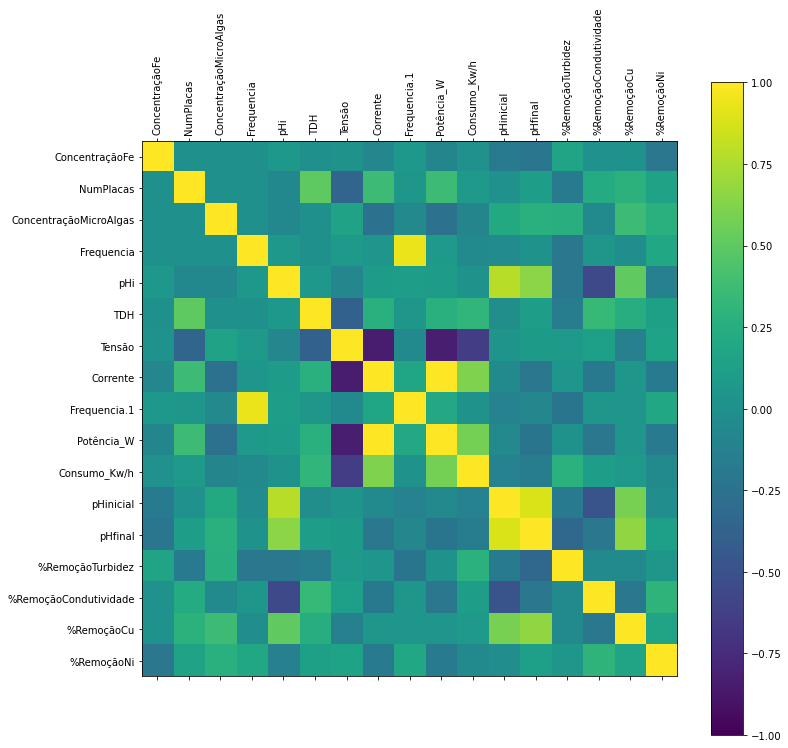

In [12]:
correlations = df[cols].corr()

fig = plt.figure(figsize=(12,12))
ax = fig.add_subplot(111)
cax = ax.matshow(correlations, vmin = -1, vmax = 1)
fig.colorbar(cax)
ticks = np.arange(0, len(cols), 1)
ax.set_xticks(ticks)
ax.set_yticks(ticks)
ax.set_xticklabels(cols, rotation = 90)
ax.set_yticklabels(cols)
plt.show()

## Visualização gráfica dos df

<Figure size 5000x5000 with 0 Axes>

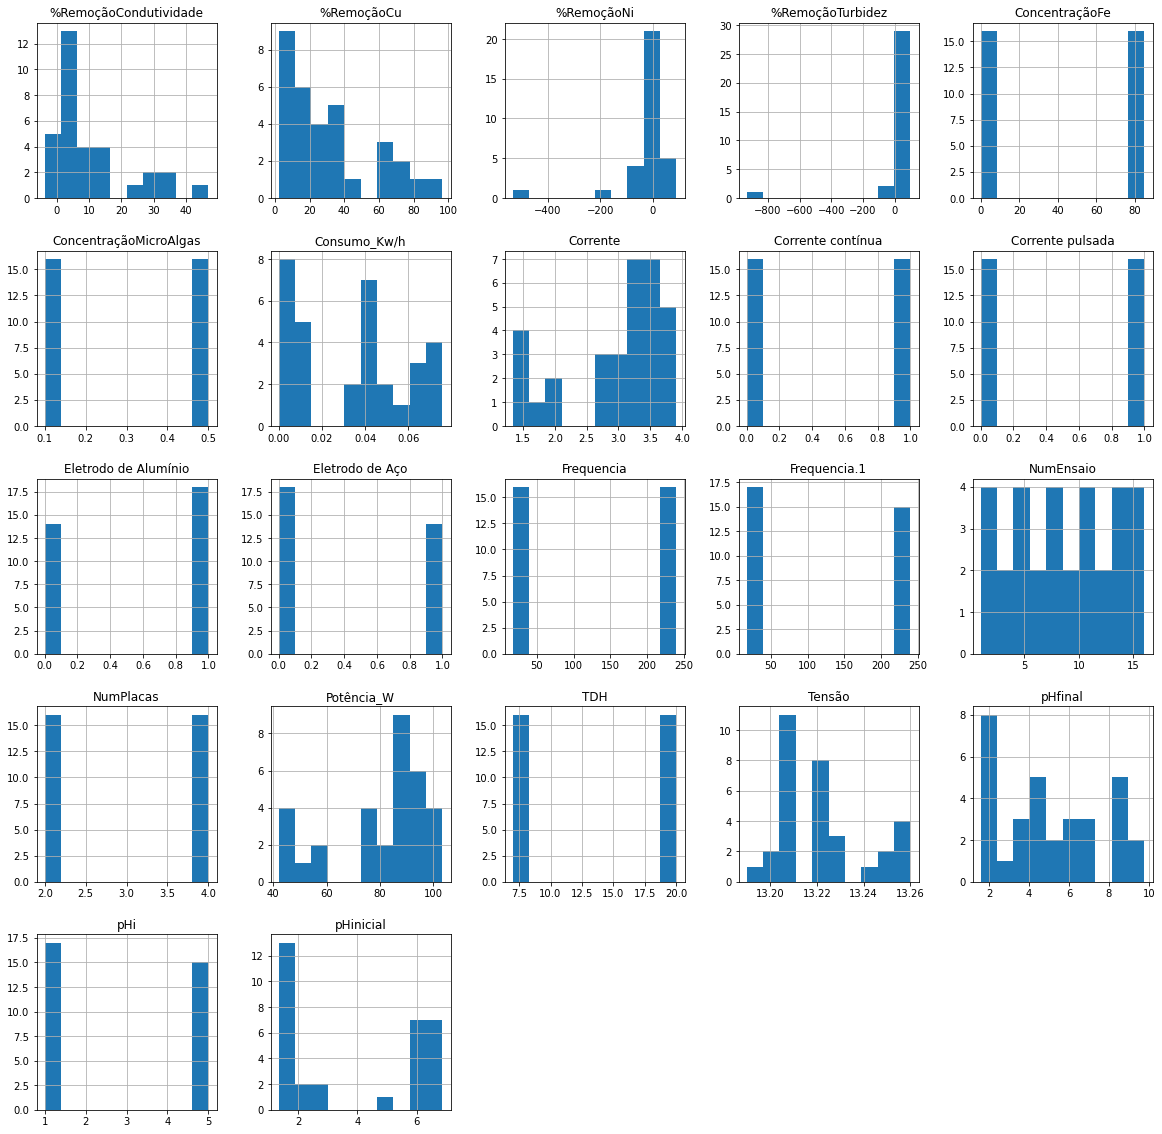

In [13]:
# Histograma
fig = plt.figure(1, figsize=(50,50), dpi=100)
df.hist()
plt.show()

In [14]:
# Densidade
df.plot(
    kind='density', 
    subplots = True, 
    layout = (6,3), 
    sharex = False)
plt.show()

ValueError: Layout of 6x3 must be larger than required size 22

<Figure size 1440x1440 with 0 Axes>

In [ ]:
# Boxplot
fig = plt.figure(figsize=(20,20))
df.plot(
    kind = 'box', 
    subplots = True, 
    layout = (6,3), 
    sharex = False, 
    sharey = False)
plt.tight_layout()
plt.show()